In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir(os.path.abspath("/Users/dipalshah/Desktop/prosperity3"))

#for Aryan: /Users/dipalshah/Desktop/prosperity3
#for Tarun: /Users/tarun/Desktop/Finance_Projects/prosperity3
#add yours: right click round_1 folder and copy path, then paste and remove the round_1 part

print("Working directory set to:", os.getcwd())

#from tools import Plotter, Regressor

Working directory set to: /Users/dipalshah/Desktop/prosperity3


In [6]:
p1 = pd.read_csv("round_3/data/prices_round_3_day_0.csv", sep=";", index_col = "timestamp")
p2 = pd.read_csv("round_3/data/prices_round_3_day_1.csv", sep=";", index_col = "timestamp")
p3 = pd.read_csv("round_3/data/prices_round_3_day_2.csv", sep=";", index_col = "timestamp")
t1 = pd.read_csv("round_3/data/trades_round_3_day_0.csv", sep=";", index_col = "timestamp")
t2 = pd.read_csv("round_3/data/trades_round_3_day_1.csv", sep=";", index_col = "timestamp")
t3 = pd.read_csv("round_3/data/trades_round_3_day_2.csv", sep=";", index_col = "timestamp")

In [3]:
p1

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,2,PICNIC_BASKET2,30094.0,11.0,30093.0,27.0,NaN,NaN,30099,1,30100.0,37.0,NaN,NaN,30096.5,0.0
0,2,VOLCANIC_ROCK_VOUCHER_9750,469.0,11.0,NaN,NaN,NaN,NaN,470,11,NaN,NaN,NaN,NaN,469.5,0.0
0,2,RAINFOREST_RESIN,9992.0,35.0,NaN,NaN,NaN,NaN,10008,35,NaN,NaN,NaN,NaN,10000.0,0.0
0,2,VOLCANIC_ROCK_VOUCHER_9500,718.0,11.0,NaN,NaN,NaN,NaN,719,11,NaN,NaN,NaN,NaN,718.5,0.0
0,2,VOLCANIC_ROCK,10218.0,150.0,10217.0,64.0,NaN,NaN,10219,150,10220.0,64.0,NaN,NaN,10218.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999900,2,PICNIC_BASKET2,30073.0,1.0,30072.0,39.0,NaN,NaN,30078,20,30079.0,20.0,NaN,NaN,30075.5,0.0
999900,2,VOLCANIC_ROCK_VOUCHER_9750,417.0,20.0,NaN,NaN,NaN,NaN,418,20,NaN,NaN,NaN,NaN,417.5,0.0
999900,2,PICNIC_BASKET1,58422.0,1.0,58421.0,39.0,NaN,NaN,58432,20,58433.0,20.0,NaN,NaN,58427.0,0.0


In [ ]:
def black_scholes(
            asset_price: float,
            strike_price: float,
            expiration_time: float,
            risk_free_rate: float,
            volatility: float,
        ) -> float:
            import math
            d1 = (math.log(asset_price / strike_price) + (risk_free_rate + volatility ** 2 / 2) * expiration_time) / (volatility * math.sqrt(expiration_time))
            d2 = d1 - volatility * math.sqrt(expiration_time)
            
            from statistics import NormalDist
            normal = NormalDist(mu=0, sigma=1)

            return asset_price * normal.cdf(d1) - strike_price * normal.cdf(d2)

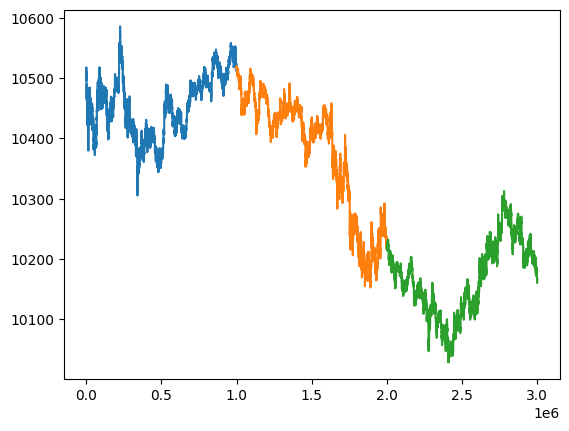

In [40]:

plt.plot(p1[p1["product"] == "VOLCANIC_ROCK"]["mid_price"], label = "bottle")
plt.plot(p2[p2["product"] == "VOLCANIC_ROCK"].index + 1000000, p2[p2["product"] == "VOLCANIC_ROCK"]["mid_price"], label = "bottle")
plt.plot(p3[p3["product"] == "VOLCANIC_ROCK"].index + 2000000, p3[p3["product"] == "VOLCANIC_ROCK"]["mid_price"], label = "bottle")

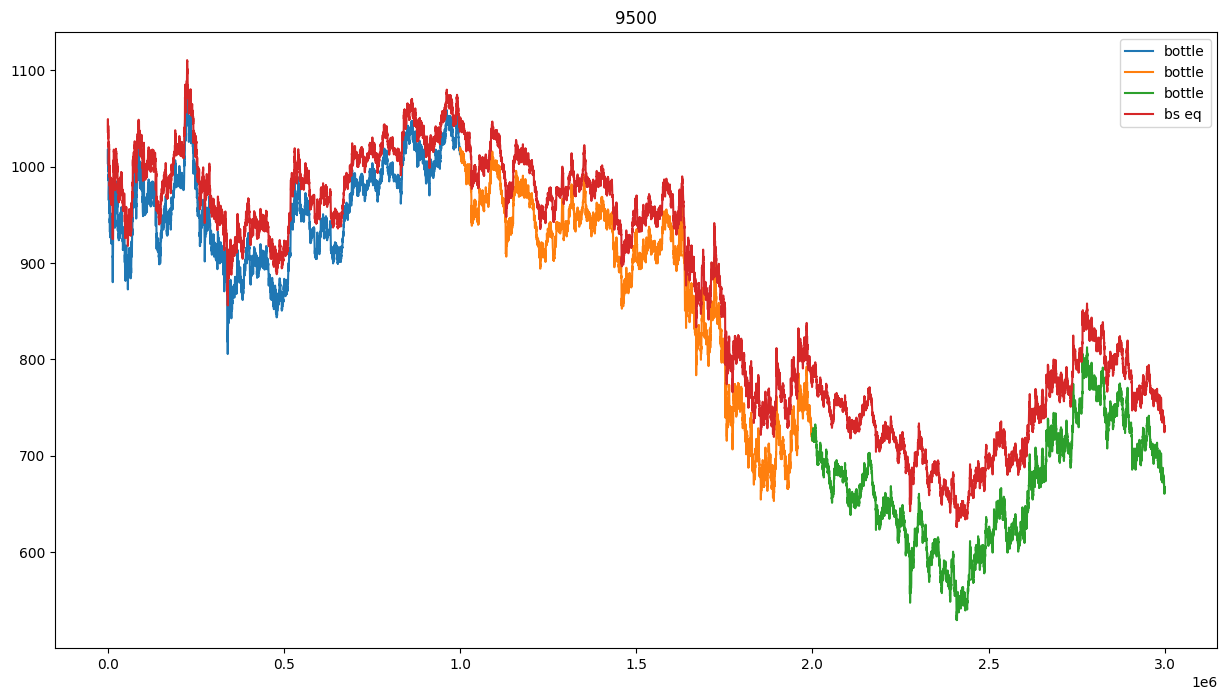

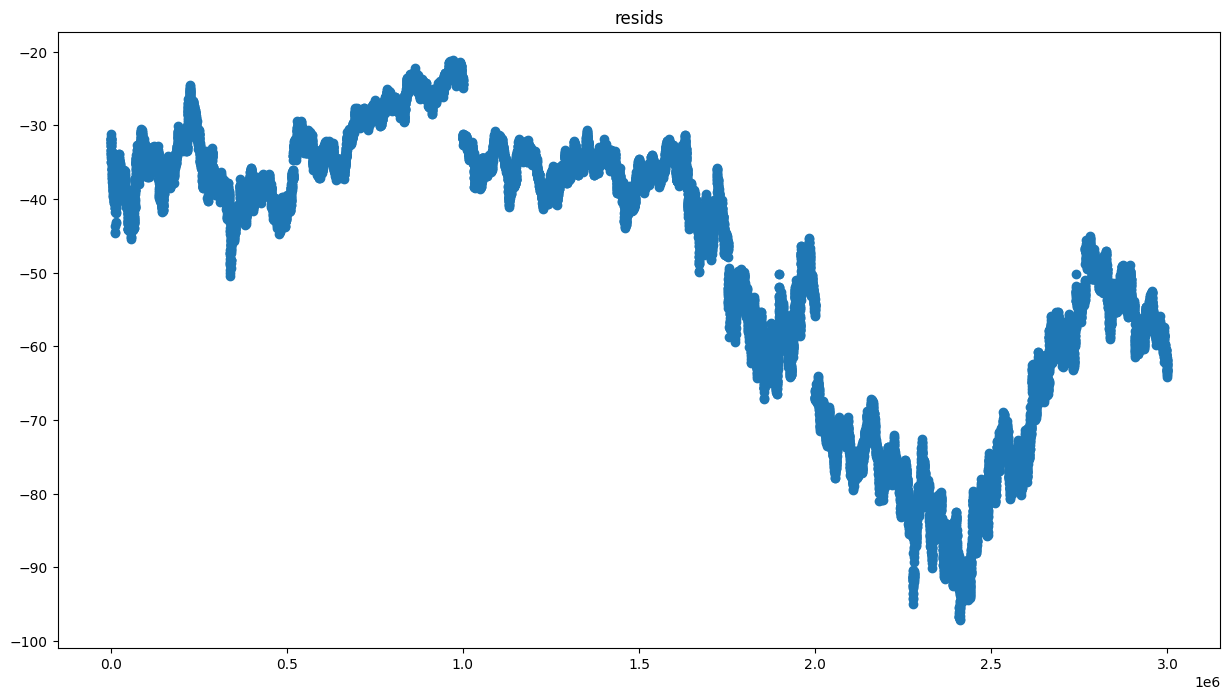

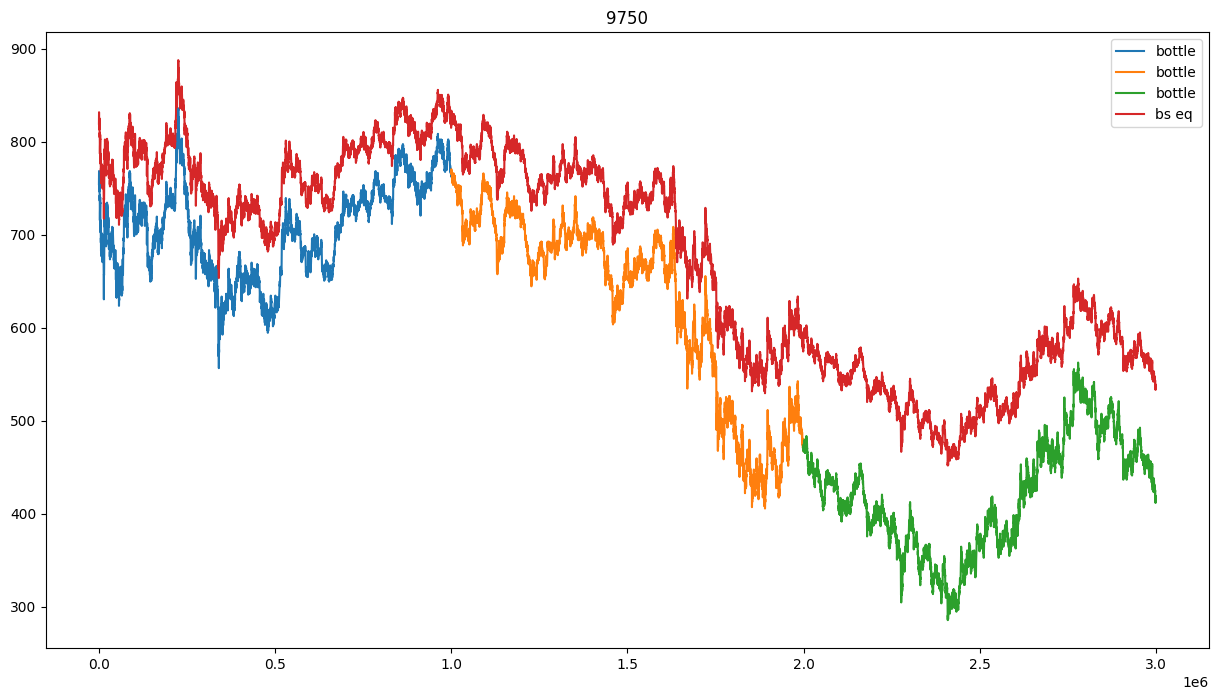

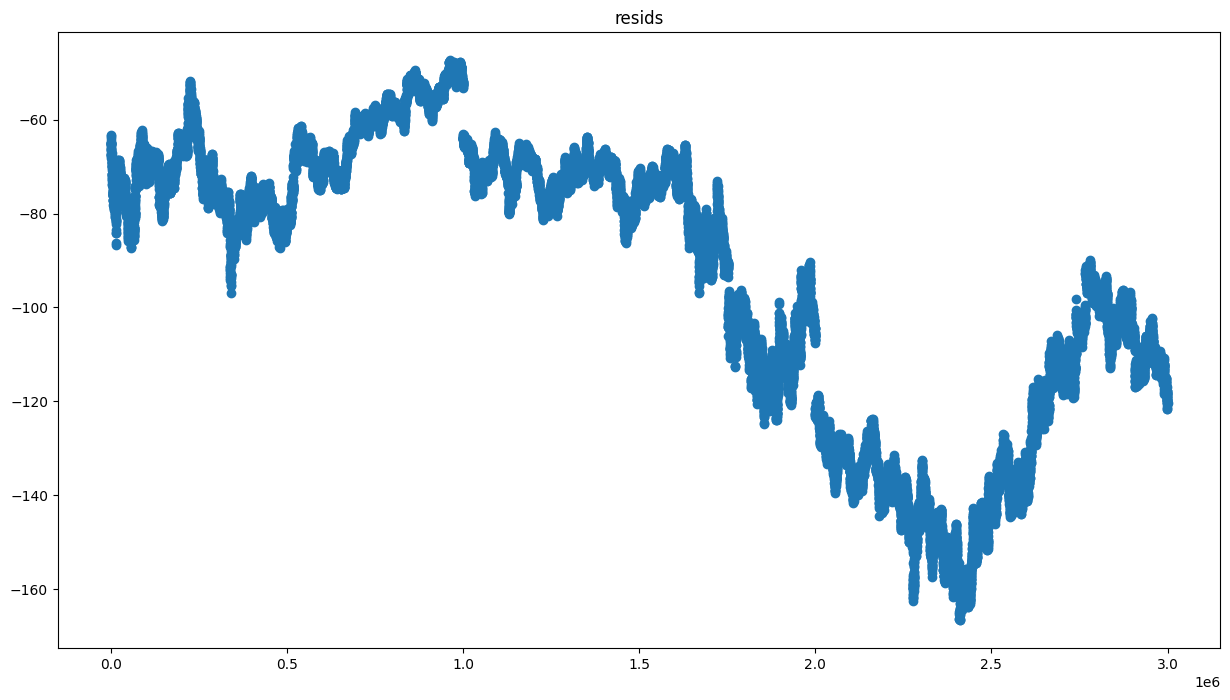

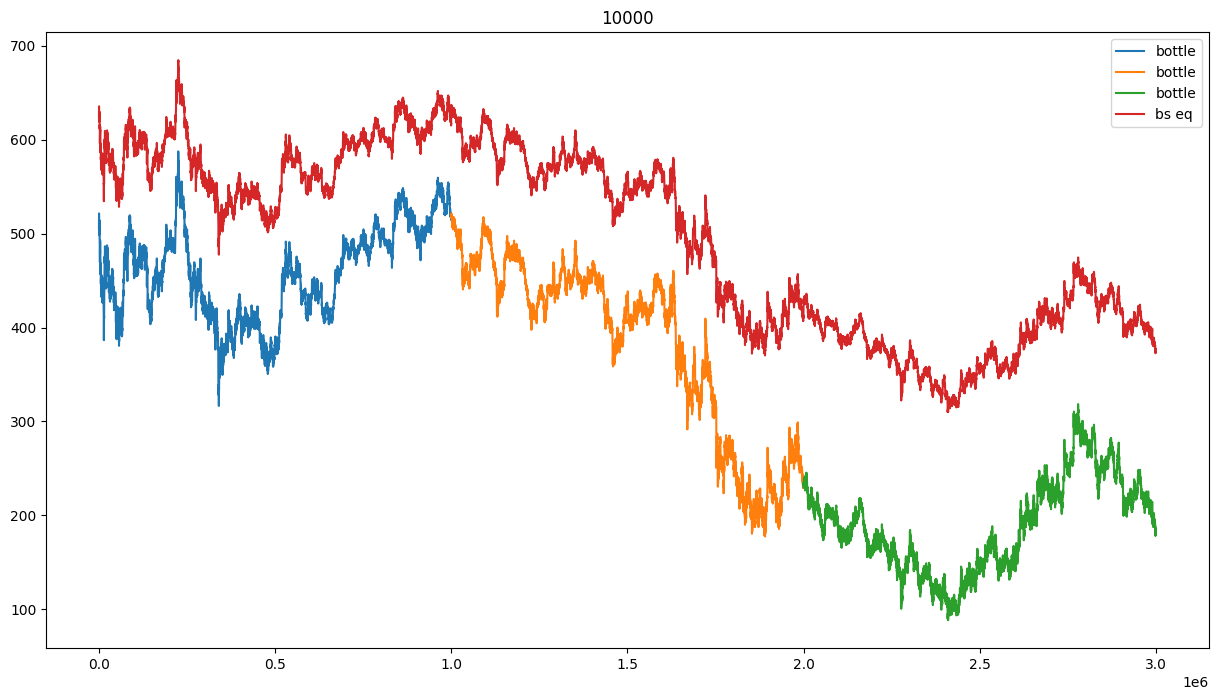

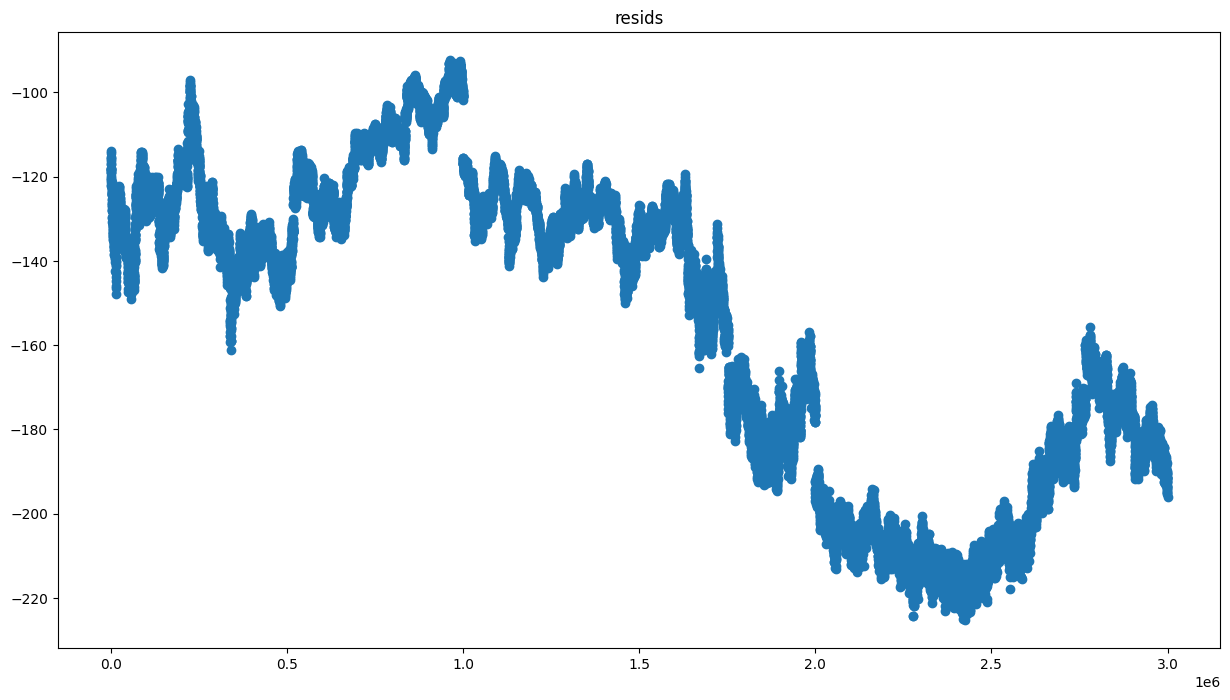

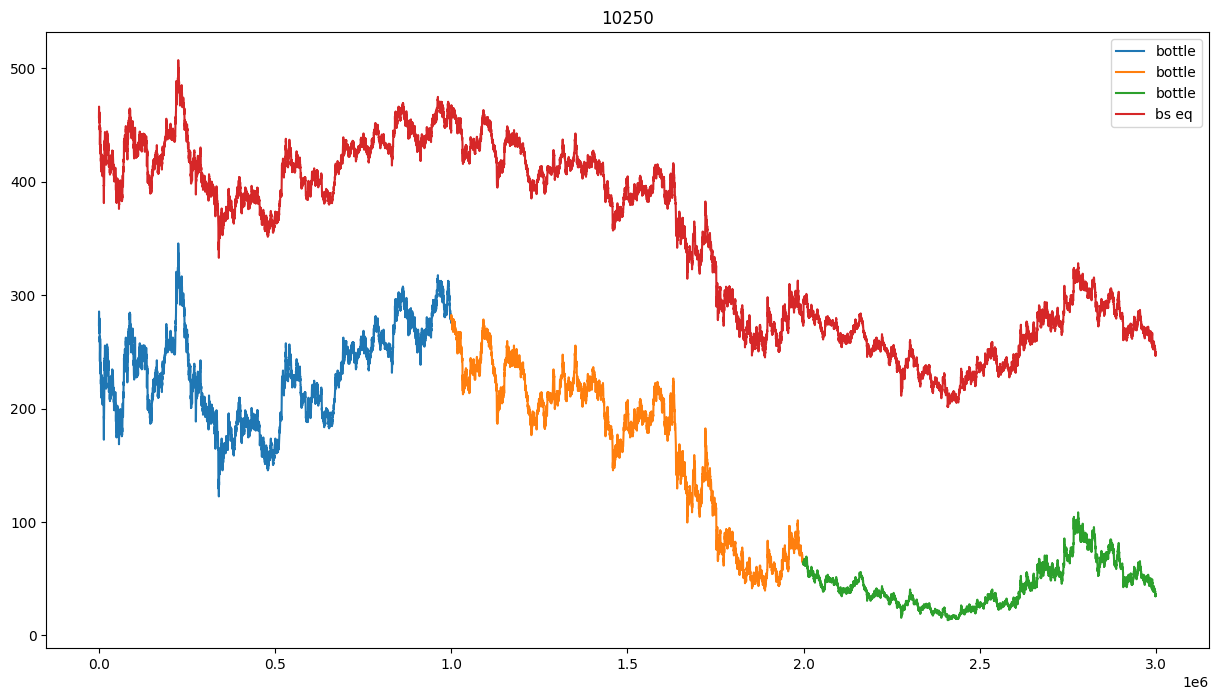

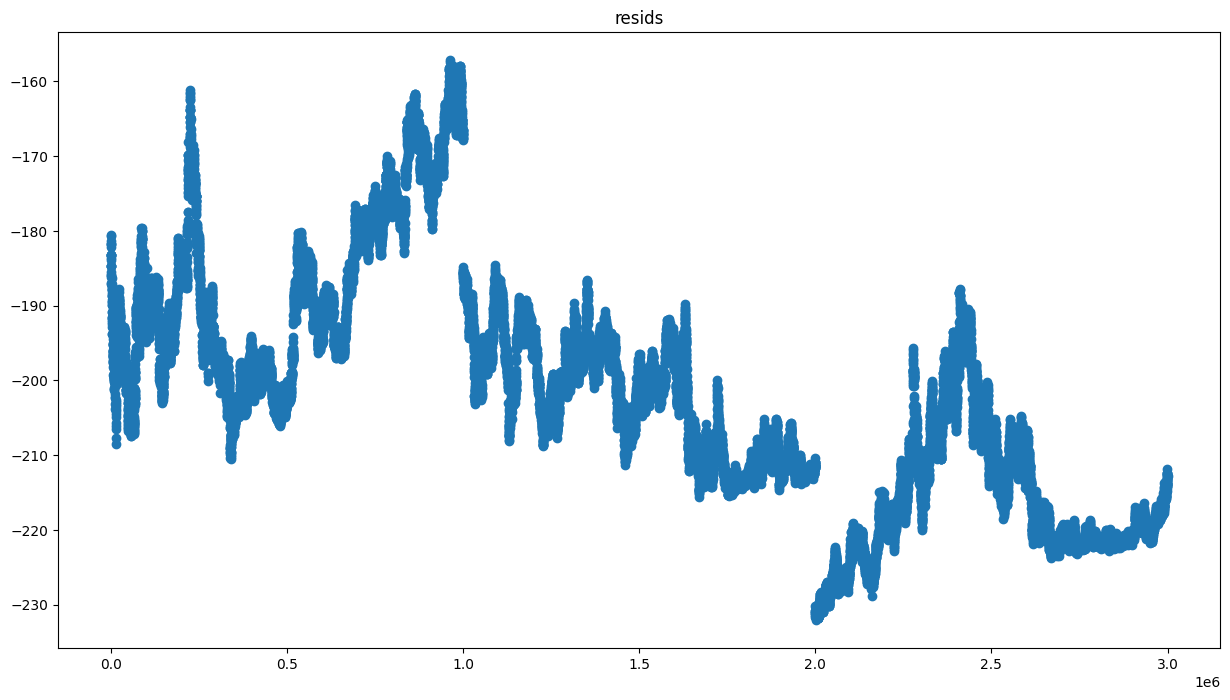

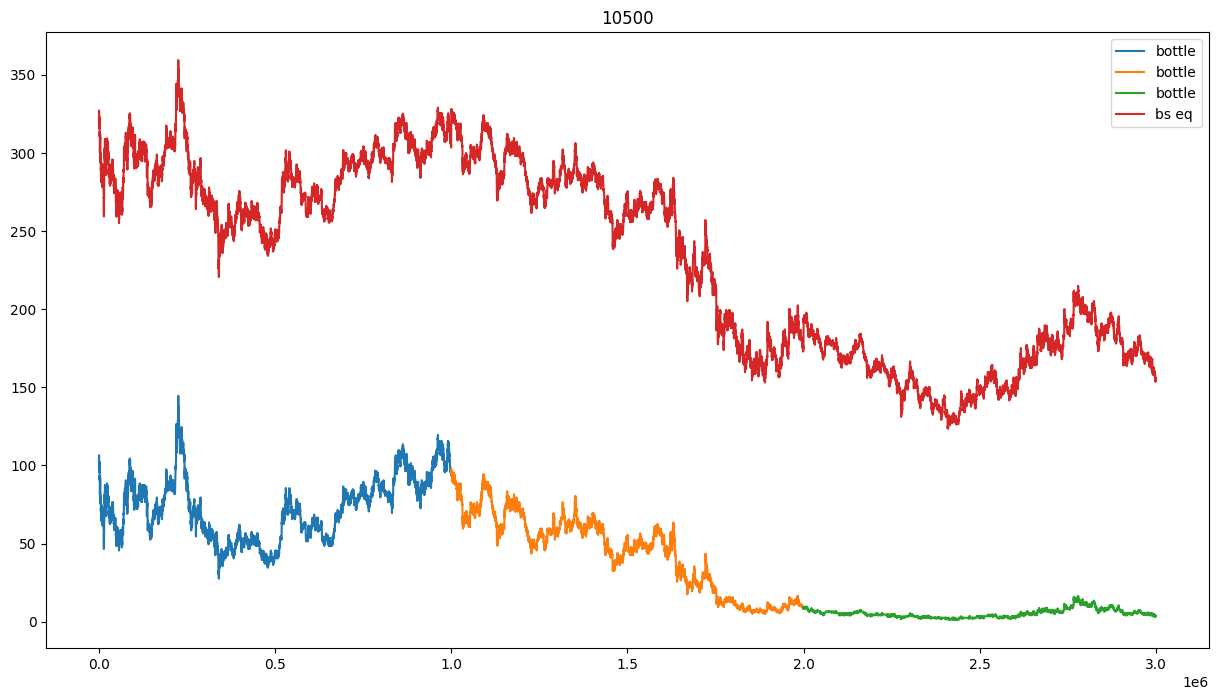

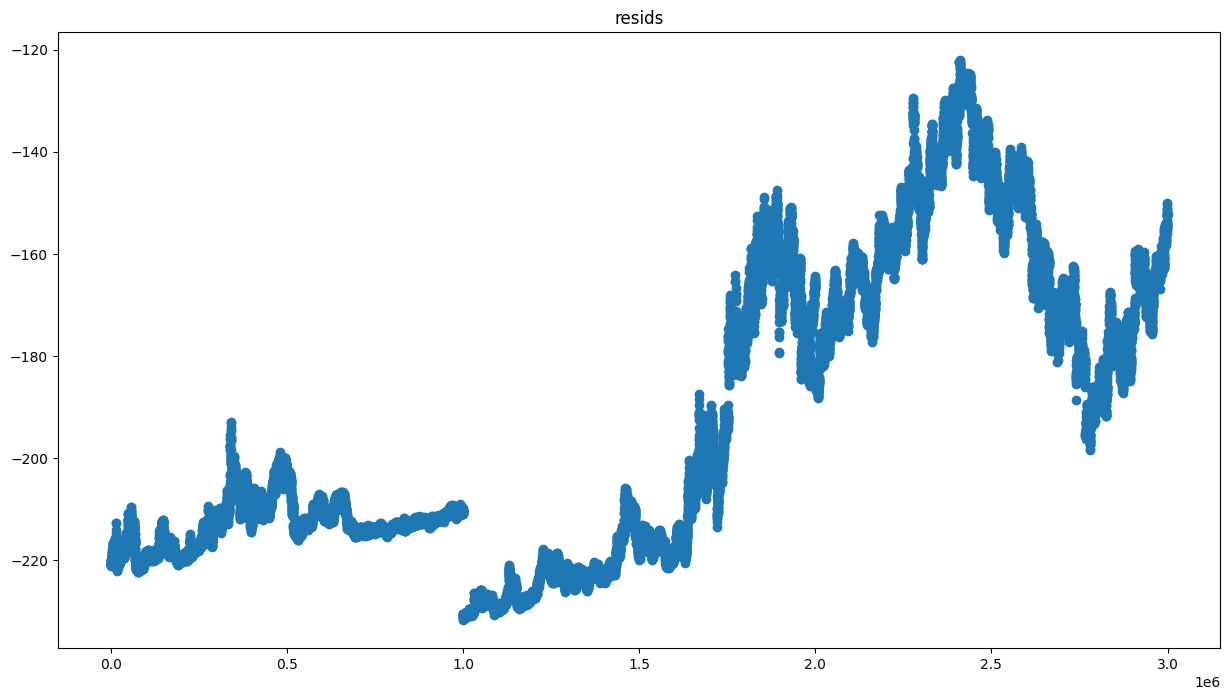

In [44]:
cutoff = 500

for strike in [9500, 9750, 10000, 10250, 10500]:
        plt.figure(figsize=(15, 8))
        plt.plot(p1[p1["product"] == f"VOLCANIC_ROCK_VOUCHER_{strike}"]["mid_price"], label = "bottle")
        plt.plot(p2[p2["product"] == f"VOLCANIC_ROCK_VOUCHER_{strike}"].index + 1000000, p2[p2["product"] == f"VOLCANIC_ROCK_VOUCHER_{strike}"]["mid_price"], label = "bottle")
        plt.plot(p3[p3["product"] == f"VOLCANIC_ROCK_VOUCHER_{strike}"].index + 2000000, p3[p3["product"] == f"VOLCANIC_ROCK_VOUCHER_{strike}"]["mid_price"], label = "bottle")

        p1["timestamp"] = p1.index
        p2["timestamp"] = p2.index
        p3["timestamp"] = p3.index

        vol = p1[p1["product"] == "VOLCANIC_ROCK"]["mid_price"].pct_change().std() * 10000**.5

        bs_prices = np.array([black_scholes(a, strike, 8 - e/1000000, 0, vol) for a, e in 
                p1[p1["product"] == "VOLCANIC_ROCK"][["mid_price", "timestamp"]].values.tolist() + 
                p2[p2["product"] == "VOLCANIC_ROCK"][["mid_price", "timestamp"]].values.tolist() + 
                p3[p3["product"] == "VOLCANIC_ROCK"][["mid_price", "timestamp"]].values.tolist()
        ])

        p1["timestamp"] = p1.index
        p2["timestamp"] = p2.index + 1000000
        p3["timestamp"] = p3.index + 2000000

        plt.plot(p1[p1["product"] == "VOLCANIC_ROCK_VOUCHER_10500"]["timestamp"].values.tolist() +
                 p2[p2["product"] == "VOLCANIC_ROCK_VOUCHER_10500"]["timestamp"].values.tolist() +
                 p3[p3["product"] == "VOLCANIC_ROCK_VOUCHER_10500"]["timestamp"].values.tolist(),
                 bs_prices, label = "bs eq"
        )

        plt.legend()
        plt.title(f"{strike}")
        plt.show()

        plt.figure(figsize=(15, 8))
        plt.scatter(p1[p1["product"] == "VOLCANIC_ROCK_VOUCHER_10500"]["timestamp"].values.tolist() +
                    p2[p2["product"] == "VOLCANIC_ROCK_VOUCHER_10500"]["timestamp"].values.tolist() +
                    p3[p3["product"] == "VOLCANIC_ROCK_VOUCHER_10500"]["timestamp"].values.tolist(),
                    np.array(p1[p1["product"] == f"VOLCANIC_ROCK_VOUCHER_{strike}"]["mid_price"].values.tolist() +
                             p2[p2["product"] == f"VOLCANIC_ROCK_VOUCHER_{strike}"]["mid_price"].values.tolist() +
                             p3[p3["product"] == f"VOLCANIC_ROCK_VOUCHER_{strike}"]["mid_price"].values.tolist()) - bs_prices
        )
        
        plt.title("resids")